# Project 3: Poisonous Mushrooms

In this project, you'll investigate properties of mushrooms. This classic dataset contains over 8000 examples, where each describes a mushroom by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. The feature space has been binarized. Look at the feature_names below to see all 126 binary names.

You'll start by running PCA to reduce the dimensionality from 126 down to 2 so that you can easily visualize the data. In general, PCA is very useful for visualization (though sklearn.manifold.tsne is known to produce better visualizations). Recall that PCA is a linear transformation. The 1st projected dimension is the linear combination of all 126 original features that captures as much of the variance in the data as possible. The 2nd projected dimension is the linear combination of all 126 original features that captures as much of the remaining variance as possible. The idea of dense low dimensional representations is crucial to machine learning!

Once you've projected the data to 2 dimensions, you'll experiment with clustering using k-means and density estimation with Gaussian mixture models (GMM). Finally, you'll train a classifier by fitting a GMM for the positive class and a GMM for the negative class, and perform inference by comparing the probabilities output by each model.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please **prepare your own write-up and write your own code**.

In [1]:
%matplotlib inline

import urllib.request as urllib2 # For python3
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm

In [2]:
MUSHROOM_DATA = 'https://raw.githubusercontent.com/UCB-MIDS/207-Applied-Machine-Learning/master/Data/mushroom.data'
MUSHROOM_MAP = 'https://raw.githubusercontent.com/UCB-MIDS/207-Applied-Machine-Learning/master/Data/mushroom.map'

Load feature names.

In [3]:
feature_names = []

for line in urllib2.urlopen(MUSHROOM_MAP):
    [index, name, junk] = line.decode('utf-8').split()
    feature_names.append(name)

print('Loaded feature names: ', len(feature_names))
print(feature_names)

Loaded feature names:  126
['cap-shape=bell', 'cap-shape=conical', 'cap-shape=convex', 'cap-shape=flat', 'cap-shape=knobbed', 'cap-shape=sunken', 'cap-surface=fibrous', 'cap-surface=grooves', 'cap-surface=scaly', 'cap-surface=smooth', 'cap-color=brown', 'cap-color=buff', 'cap-color=cinnamon', 'cap-color=gray', 'cap-color=green', 'cap-color=pink', 'cap-color=purple', 'cap-color=red', 'cap-color=white', 'cap-color=yellow', 'bruises?=bruises', 'bruises?=no', 'odor=almond', 'odor=anise', 'odor=creosote', 'odor=fishy', 'odor=foul', 'odor=musty', 'odor=none', 'odor=pungent', 'odor=spicy', 'gill-attachment=attached', 'gill-attachment=descending', 'gill-attachment=free', 'gill-attachment=notched', 'gill-spacing=close', 'gill-spacing=crowded', 'gill-spacing=distant', 'gill-size=broad', 'gill-size=narrow', 'gill-color=black', 'gill-color=brown', 'gill-color=buff', 'gill-color=chocolate', 'gill-color=gray', 'gill-color=green', 'gill-color=orange', 'gill-color=pink', 'gill-color=purple', 'gill-col

Load data. The dataset is sparse, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [4]:
X, Y = [], []

for line in urllib2.urlopen(MUSHROOM_DATA):
    items = line.decode('utf-8').split()
    Y.append(int(items.pop(0)))
    x = np.zeros(len(feature_names))
    for item in items:
        feature = int(str(item).split(':')[0])
        x[feature] = 1
    X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print(train_data.shape, test_data.shape)

(7000, 126) (1124, 126)


### Part 1:

Do a principal components analysis on the data. Show what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 2, 3, 4, 5, 10, 20, 30, 40, 50].  Also show a lineplot of fraction of total variance vs. number of principal components, for all possible numbers of principal components.

Notes:
* You can use `PCA` to produce a PCA analysis.

K =  1 , Explained Variance =  1.8650733500529504 , Total Variance =  1.8650733500529504
K =  2 , Explained Variance =  1.5147990458276095 , Total Variance =  3.3798723958805006
K =  3 , Explained Variance =  1.1566605376514292 , Total Variance =  4.53653293353344
K =  4 , Explained Variance =  0.8030609491942498 , Total Variance =  5.339593882727908
K =  5 , Explained Variance =  0.4396136580036282 , Total Variance =  5.7792075407138555
K =  10 , Explained Variance =  0.2536414576062406 , Total Variance =  7.415285176964182
K =  20 , Explained Variance =  0.1302907458085038 , Total Variance =  9.196804100829421
K =  30 , Explained Variance =  0.07937256766055756 , Total Variance =  10.215290250635846
K =  40 , Explained Variance =  0.04997648325372073 , Total Variance =  10.811410665666102
K =  50 , Explained Variance =  0.023244453360994923 , Total Variance =  11.165915161314866


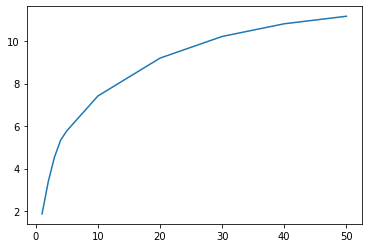

In [5]:
def P1():

## STUDENT START ###
    principal_components = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50]
    variance = []
    total_variance = []
    for k in principal_components:
        #fit a pca
        pca = PCA(n_components = k)
        pca.fit(train_data)
        #append the variance values
        variance.append(pca.explained_variance_[-1])
        total_variance.append(sum(pca.explained_variance_))
        print ("K = ", k, ", Explained Variance = ", pca.explained_variance_[-1], ", Total Variance = ", total_variance[-1])
    plt.plot(principal_components, total_variance)
    #np.divide(variance, total_variance)
## STUDENT END ###

P1()

### Part 2:

PCA can be very useful for visualizing data. Project the training data down to 2 dimensions and show as a square scatterplot. Show the positive (poisonous) examples in red and the negative (non-poisonous) examples in green. Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html

Notes:
* You can use `PCA` to produce a PCA analysis.

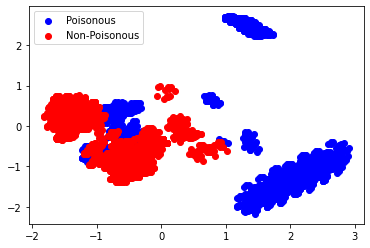

In [6]:
def P2():

## STUDENT START ###
    #fit pca for 2 components
    pca = PCA(n_components = 2)
    pca_data = pca.fit_transform(train_data)
#     print(pca_data)
    #identify poisonous and non-poisonous examples
    positive_cases = pca_data[np.where(train_labels == 1)]
    negative_cases = pca_data[np.where(train_labels == 0)]
    #plot
    plt.scatter(positive_cases[:,0], positive_cases[:,1], c="Blue", label="Poisonous")
    plt.scatter(negative_cases[:,0], negative_cases[:,1], c="Red", label="Non-Poisonous")
    plt.legend()
## STUDENT END ###

P2()

### Part 3:

Fit a k-means cluster model with 6 clusters over the 2d projected data. As in part 2, show as a square scatterplot with the positive (poisonous) examples in red and the negative (non-poisonous) examples in green.  For each cluster, mark the centroid and plot a circle that goes through the cluster's example that is most distant from the centroid.

Notes:
* You can use `KMeans` to produce a k-means cluster analysis.
* You can use `linalg.norm` to determine distance (dissimilarity) between observations.

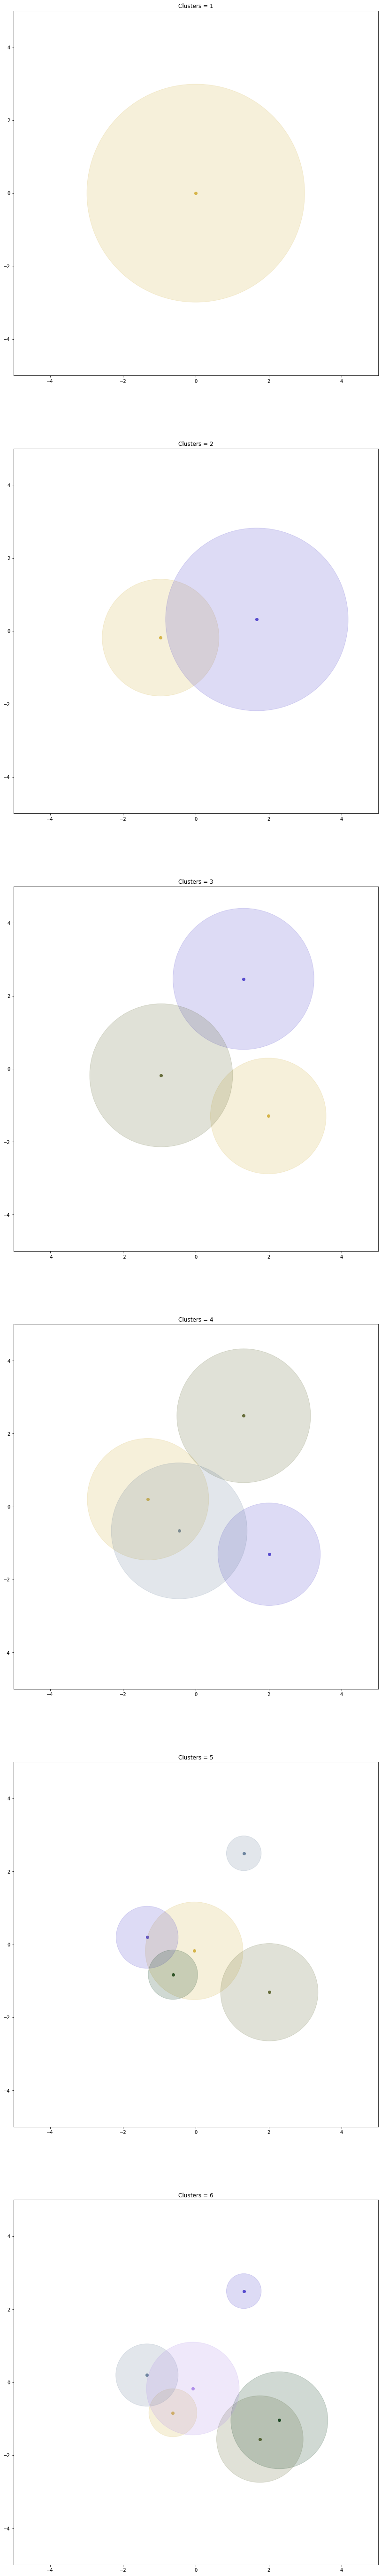

In [7]:
def P3():

## STUDENT START ###
    #fit pca for 2 components
    pca = PCA(n_components = 2)
    pca_data = pca.fit_transform(train_data)
    fig = plt.figure(figsize=(100, 100))
    colors = np.random.rand(6, 3)
    #show 6 clusters
    for i in range(1, 7):
        #using k means to get clusters
        kMeans = KMeans(n_clusters=i, init='k-means++')
        #get centroid, distances and clusters
        centroids = kMeans.fit(pca_data)
        distances = kMeans.transform(pca_data)
        clusters = kMeans.predict(pca_data)
        
        #plot the clusters
        ax = plt.subplot(6, 1, i, aspect='equal')
        title = "Clusters = " + str(i)
        ax.set_title(title)
        for n in range(i):
            j = np.where(clusters == n)
            center = tuple(centroids.cluster_centers_[n])
            radius = np.max(distances[j, n])
            ax.axis([-5, 5, -5, 5])
            circle = plt.Circle(center, radius, color=colors[n], alpha=0.2)
            plt.scatter(center[0], center[1], color=colors[n])
            ax.add_artist(circle)
## STUDENT END ###

P3()

### Part 4:

Fit Gaussian mixture models for the positive (poisonous) examples in your 2d projected data. Vary the number of mixture components from 1 to 4 and the covariance matrix type 'spherical', 'diag', 'tied', 'full' (that's 16 models).  Show square plots of the estimated density contours presented in a 4x4 grid - one row each for a number of mixture components and one column each for a convariance matrix type.  

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.
* You can use `contour` in combination with other methods to plot contours, like in this example: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py
* You can use `contour` without the `norm` and `levels` parameters. 

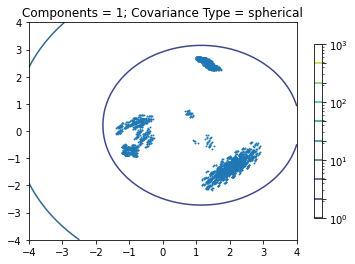

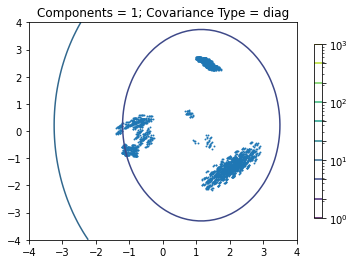

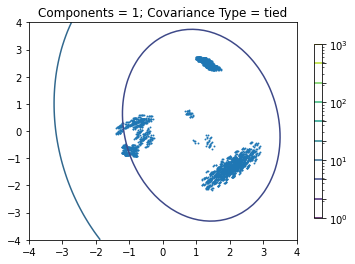

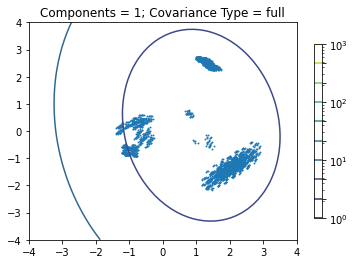

<ipython-input-8-45a49faed34f>:26: UserWarning: Log scale: values of z <= 0 have been masked
  CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10))


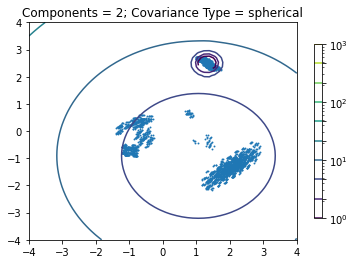

<ipython-input-8-45a49faed34f>:26: UserWarning: Log scale: values of z <= 0 have been masked
  CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10))


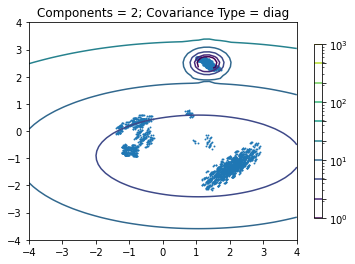

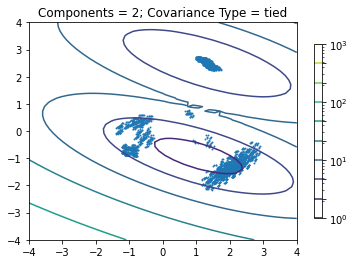

<ipython-input-8-45a49faed34f>:26: UserWarning: Log scale: values of z <= 0 have been masked
  CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10))


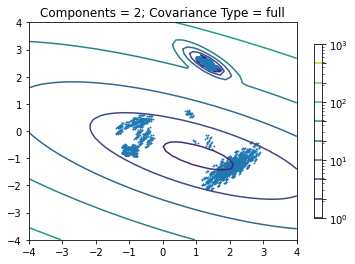

<ipython-input-8-45a49faed34f>:26: UserWarning: Log scale: values of z <= 0 have been masked
  CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10))


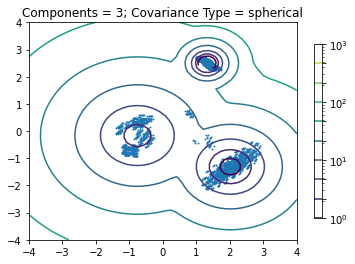

<ipython-input-8-45a49faed34f>:26: UserWarning: Log scale: values of z <= 0 have been masked
  CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10))


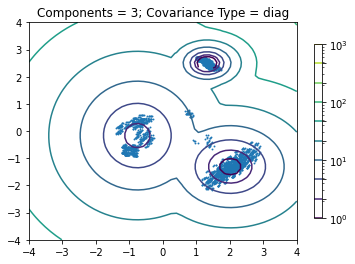

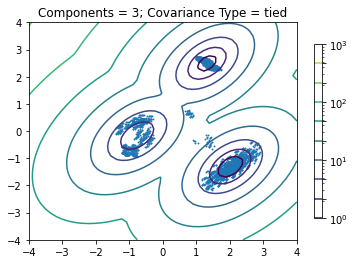

<ipython-input-8-45a49faed34f>:26: UserWarning: Log scale: values of z <= 0 have been masked
  CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10))


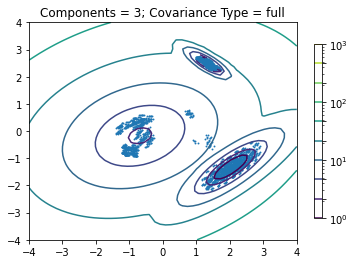

<ipython-input-8-45a49faed34f>:26: UserWarning: Log scale: values of z <= 0 have been masked
  CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10))


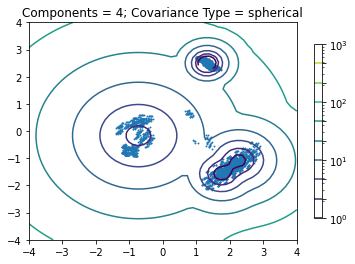

<ipython-input-8-45a49faed34f>:26: UserWarning: Log scale: values of z <= 0 have been masked
  CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10))


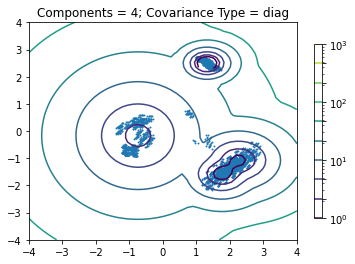

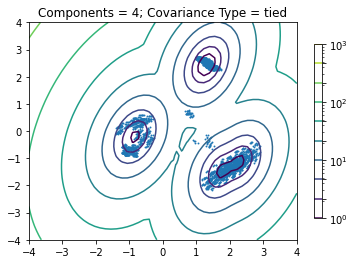

<ipython-input-8-45a49faed34f>:26: UserWarning: Log scale: values of z <= 0 have been masked
  CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10))


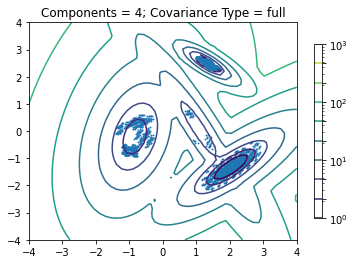

In [8]:
def P4():

## STUDENT START ###
    #fit pca for 2 components
    pca = PCA(n_components = 2)
    pca_data = pca.fit_transform(train_data)
    #get poisonous; set covarianceMatrixTypes array
    poisonous = pca_data[np.where(train_labels == 1)]
    covarianceMatrixTypes = ['spherical', 'diag', 'tied', 'full']
    #for 4 mixture components
    for i in range(1, 5):
        for mType in covarianceMatrixTypes:
            #gaussianMatrix fit
            gaussianMixture = GaussianMixture(n_components=i, covariance_type=mType, random_state=12345)
            gaussianMixture.fit(poisonous)
            
            
            x = np.linspace(-4.0, 4.0)
            y = np.linspace(-4.0, 4.0)
            X, Y = np.meshgrid(x, y)
            XX = np.array([X.ravel(), Y.ravel()]).T
            Z = -gaussianMixture.score_samples(XX)
            Z = Z.reshape(X.shape)
            
            #plot contours
            CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10))
            CB = plt.colorbar(CS, shrink=0.8)
            plt.scatter(poisonous[:, 0], poisonous[:, 1], .8)
            title = 'Components = ' + str(i) + '; Covariance Type = ' + str(mType)
            plt.title(title)
            plt.axis('tight')
            plt.show()
## STUDENT END ###

P4()

### Part 5:

Fit two Gaussian mixture models, one for the positive examples and one for the negative examples in your 2d projected data. Use 4 mixture components and full convariance for each model.  Predict the test example labels by picking the labels corresponding to the larger of the two models' probabilities.  What is the accuracy of you predictions on the test data?

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.
* You can use `GaussianMixture`'s `score_samples` method to find the probabilities.

In [9]:
def P5():

## STUDENT START ###
    #fit pca for 2 components
    pca = PCA(n_components = 2)
    pca.fit(train_data)
    pca_train_data = pca.transform(train_data)
    pca_test_data = pca.transform(test_data)
    
    #poisonous and non-poisonous
    poisonous = pca_train_data[np.where(train_labels == 1)]
    safe = pca_train_data[np.where(train_labels == 0)]
    
    #gaussianMixture model poisonous
    gaussianMixture1 = GaussianMixture(n_components=4, covariance_type='full', random_state=12345)
    gaussianMixture1.fit(poisonous)
   
    #gaussianMixture model safe
    gaussianMixture2 = GaussianMixture(n_components=4, covariance_type='full', random_state=12345)
    gaussianMixture2.fit(safe)
    
    #probabilities of each model
    probPoison = gaussianMixture1.score_samples(pca_test_data)
    probSafe = gaussianMixture2.score_samples(pca_test_data)
    #print(len(probPoison))
    #print(len(probSafe))
    
    #figure out the predicted label based on proabilities
    predicted_labels = []
    for i in range(len(probPoison)):
        if (probPoison[i] >= probSafe[i]):
            predicted_labels.append(1)
        else:
            predicted_labels.append(0)
     
    #calculate accuracy
    correctLabels = np.sum(predicted_labels==test_labels) 
    accuracy = correctLabels / len(test_labels)
    print("Accuracy is " + str(accuracy))
    
## STUDENT END ###

P5()

Accuracy is 0.9501779359430605


### Part 6:

Run a series of experiments to find the Gaussian mixture model that results in the best accuracy with no more than 50 parameters.  Do this by varying the number of PCA components, the number of GMM components, and the covariance type.

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.


* For spherical, diag, and full covariance types:
  * number of parameters = (number of parameters per gmm component * number of gmm components - 1) * number of classes
  * number of parameters per gmm component includes all the means plus all the non-zero, non-duplicated values in the covariance matrix plus the mixing weight
  * Each mixing weight parameter indicates how much to weight a particular gmm component; the -1 above accounts for the fact that the mixing weights must sum to 1, so you do not need to include the last mixing weight as its own parameter


* To calculate the number of parameters for tied covariance type:
  * number of parameters = (number of parameters per class - 1) * number of classes
  * number of parameters per class includes all the means and mixing weights for all the gmm components plus all the non-zero, non-duplicated values in the one shared covariance matrix
  * Each mixing weight parameter indicates how much to weight a particular gmm component; the -1 above accounts for the fact that the mixing weights must sum to 1, so you do not need to include the last mixing weight as its own parameter

In [10]:
def getAccuracy(pca_test_data, gaussianMixture1, gaussianMixture2):
    #figure out the predicted label based on proabilities
    predicted_labels = []
    for data in pca_test_data: #Iterate through each test example and calculate probabilities
        probPoison = (np.exp(gaussianMixture1.score(data.reshape(1,-1))))
        probSafe = (np.exp(gaussianMixture2.score(data.reshape(1,-1))))
         
        if (probPoison >= probSafe):
            predicted_labels.append(1)
        else:
            predicted_labels.append(0)
    
    #calculate accuracy
    correctLabels = np.sum(predicted_labels==test_labels) 
    accuracy = correctLabels / len(test_labels)
    
    return accuracy



def P6():

## STUDENT START ###
    #setup each component
    gmmComponents = [1, 2, 3, 4, 5]
    covarianceTypes = ['spherical', 'tied', 'diag', 'full']
    pcaComponents = [1, 2, 3, 4, 5]
    
    bestAccuracy = 0
    bestCovariance = ""
    bestPCAComponent = 0
    bestParameter = 0
    bestGMMComponent = 0
    
    #loop through all options
    for gmm in gmmComponents:
        for covariance in covarianceTypes:
            for component in pcaComponents:
                    #fit pca model
                    pca = PCA(n_components = component)
                    pca.fit(train_data)
                    pca_train_data = pca.transform(train_data)
                    pca_test_data = pca.transform(test_data)
                    
                    #identify poisonous and non-poisonous
                    poisonous = pca_train_data[np.where(train_labels == 1)]
                    safe = pca_train_data[np.where(train_labels == 0)]
                    
                    #poisonous model
                    gaussianMixture1 = GaussianMixture(n_components=gmm, covariance_type=covariance, random_state=12345)
                    gaussianMixture1.fit(poisonous)
                    
                    #non-poisonous model
                    gaussianMixture2 = GaussianMixture(n_components=gmm, covariance_type=covariance, random_state=12345)
                    gaussianMixture2.fit(safe)
                    
                    #get the covariances and means
                    covariances = gaussianMixture1.covariances_ 
                    means = gaussianMixture1.means_
                    covParameters = len(covariances.flatten())
                    meanParameters = len(means.flatten())
                    
                    #calculate parameters and accuracy
                    classes = 2
                    totalParameters = classes * (meanParameters + covParameters)
                    accuracy = getAccuracy(pca_test_data, gaussianMixture1, gaussianMixture2)
                    
                    #identify the best of each parameter
                    if (accuracy > bestAccuracy and totalParameters <= 50): # Only want 50 parameters or less
                        bestAccuracy = accuracy
                        bestCovariance = covariance
                        bestPCAComponent = component
                        bestParameter = totalParameters
                        bestGMMComponent = gmm
                        
    print ("Best Accuracy: " + str(bestAccuracy))
    print ("Best Covariance: " + str(bestCovariance))
    print ("Best PCA Component: " + str(bestPCAComponent))
    print ("Best GMM Component: " + str(bestGMMComponent))
    print ("Best Parameters: " + str(bestParameter))
## STUDENT END ###

P6()

Best Accuracy: 0.9688612099644128
Best Covariance: spherical
Best PCA Component: 5
Best GMM Component: 4
Best Parameters: 48
